In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/SeoulBikeDataDel.csv', na_values = '?' )

In [3]:
df = dataset
df = df.replace('?', np.NaN)
df = df.dropna()
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [4]:
#分割資料集
#x_train = df.sample(frac=0.7)
#x_test= df[~df.index.isin(x_train.index)]
X = df.drop(['Rented Bike Count'], axis=1) #刪除欄位
Y = df['Rented Bike Count'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
#x_train

In [6]:
#Min-Max
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
#x_train_norm = scaler.transform(x_train)
#scaler2 = MinMaxScaler(feature_range=(0, 1)).fit(x_test)
#x_test_norm = scaler2.transform(x_test)
#x_test_norm

In [7]:
#Random forest

# 建立RandomForestRegressor模型
#n_estimators樹木的數量
#regressorModel2 = RandomForestRegressor(n_estimators=150,random_state =0)
#model.fit(x_train, y_train)
#regressorModel2.fit(x_train_norm, y_train)
# 使用訓練資料預測
#pre=regressorModel2.predict(x_train_norm)

In [8]:
#Random forest

# 建立RandomForestRegressor模型
#n_estimators樹木的數量
regressorModel = RandomForestRegressor(n_estimators=150,random_state =0)
#model.fit(x_train, y_train)
regressorModel.fit(x_train, y_train)
# 使用訓練資料預測
predicted=regressorModel.predict(x_train)

In [9]:
# 預測成功的比例
print('訓練集: ',regressorModel.score(x_train,y_train))
print('測試集: ',regressorModel.score(x_test,y_test))

MSE = metrics.mean_squared_error(y_train, predicted)
RMSE = metrics.mean_squared_error(y_train, predicted)**0.5
MAE = metrics.mean_absolute_error(y_train, predicted)
MAPE = metrics.mean_absolute_percentage_error(y_train, predicted)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

訓練集:  0.967727044979322
測試集:  0.7699804759753082
RMSE:115.84
MAE:68.84
MAPE:46218165470412392.00 %


In [10]:
# 預測成功的比例
#print('訓練集: ',regressorModel.score(x_train_norm,y_train))
#print('測試集: ',regressorModel.score(x_test_norm,y_test))

#MSE = metrics.mean_squared_error(y_train, pre)
#RMSE = metrics.mean_squared_error(y_train, pre)**0.5
#MAE = metrics.mean_absolute_error(y_train, pre)
#MAPE = metrics.mean_absolute_percentage_error(y_train, pre)

#print("RMSE:%.2f" %RMSE)
#print("MAE:%.2f" %MAE)
#print("MAPE:%.2f" %MAPE,"%")

Feature: Hour, Score: 0.29
Feature: Temperature(°C), Score: 0.36
Feature: Humidity(%), Score: 0.08
Feature: Wind speed (m/s), Score: 0.04
Feature: Visibility (10m), Score: 0.04
Feature: Dew point temperature(°C), Score: 0.05
Feature: Solar Radiation (MJ/m2), Score: 0.11
Feature: Rainfall(mm), Score: 0.04
Feature: Snowfall (cm), Score: 0.00


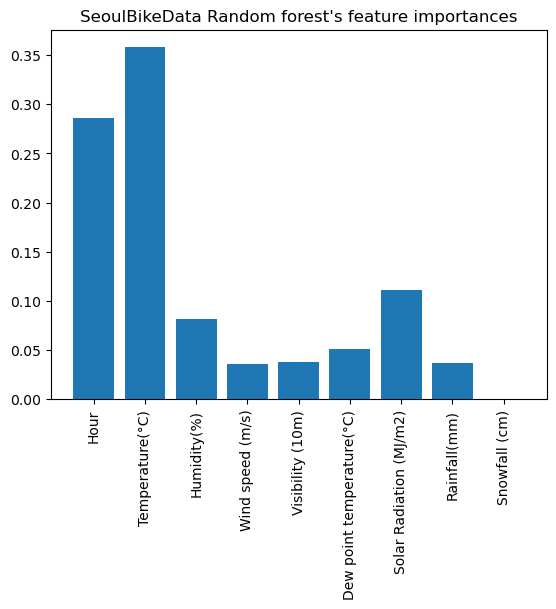

In [11]:
x_labels = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
regressorImportance = regressorModel.feature_importances_

for i,v in enumerate(regressorImportance):
    print('Feature: %s, Score: %.2f' % (x_labels[i],v))
    
# plot
plt.bar(range(len(regressorModel.feature_importances_)), regressorModel.feature_importances_)
x = [0,1,2,3,4,5,6,7,8,]
plt.title('SeoulBikeData Random forest\'s feature importances')
x_labels = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
plt.xticks(x,x_labels,rotation ='vertical')
plt.show()

In [16]:
#刪除特徵
x_train_del = x_train.drop(['Hour','Temperature(°C)'], axis=1) 
x_test_del = x_test.drop(['Hour','Temperature(°C)'], axis=1) 
x_train_del

,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
8415,61,3.9,719,5.8,1.03,0.0,0.0
5049,86,1.7,538,20.4,0.76,0.0,0.0
8395,46,1.4,869,0.0,0.00,0.0,0.0
1535,69,2.0,1434,-7.5,0.00,0.0,0.0
5518,73,1.5,1005,21.9,0.00,0.0,0.0
...,...,...,...,...,...,...,...
5734,74,2.0,1201,24.7,0.00,0.0,0.0
5191,90,0.5,445,21.7,0.05,0.5,0.0
5390,62,2.7,1941,21.4,1.79,0.0,0.0
860,51,1.1,1391,-12.1,0.00,0.0,0.0


In [17]:
#Random forest
# 建立RandomForestRegressor模型
#n_estimators樹木的數量
regressorModel2 = RandomForestRegressor(n_estimators=150,random_state =0)

regressorModel2.fit(x_train_del, y_train)
# 使用訓練資料預測
Delpredicted=regressorModel2.predict(x_train_del)

# 預測成功的比例
print('訓練集: ',regressorModel2.score(x_train_del,y_train))
print('測試集: ',regressorModel2.score(x_test_del,y_test))

MSE = metrics.mean_squared_error(y_train, Delpredicted)
RMSE = metrics.mean_squared_error(y_train, Delpredicted)**0.5
MAE = metrics.mean_absolute_error(y_train, Delpredicted)
MAPE = metrics.mean_absolute_percentage_error(y_train, Delpredicted)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

訓練集:  0.9448000933341925
測試集:  0.6081323841437274
RMSE:151.50
MAE:100.71
MAPE:43533287343587600.00 %
